In [196]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


In [197]:
# Read the mouse data and the study results:
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
#mouse_metadata
study_results= pd.read_csv("data/Study_results.csv")



In [198]:
# Combine the data into a single dataset:
mice_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
mice_results_df = mice_results
mice_results_df.head()


# Display the data table for preview
mice_results_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [199]:
# Checking the number of mice.
mouse_total = mice_results_df["Mouse ID"].nunique()
mouse_total

249

In [200]:
# Checking for missing values:
mice_results_df.isnull().sum()


Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [201]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_results_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False
                          )

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [202]:
dup_mouse_id = mice_results_df.loc[mice_results_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(dup_mouse_id)

['g989']


In [203]:
# Get all the data for the duplicate mouse ID
dup_mouse_df = mice_results_df.loc[mice_results_df["Mouse ID"] == "g989", :]
dup_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [204]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mice_results_df[mice_results_df['Mouse ID'].isin(dup_mouse_id)==False]
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [205]:
# Recheck the number of mice to make sure g989 is droppped
new_total_mice = clean_mouse_df["Mouse ID"].nunique()
new_total_mice




248

# Summary Statistics


In [206]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
mean = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).mean()
median = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).median()
var = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).var()
std_dev = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).std()
sem = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median,
                               "Tumor Volume Variance": var, "Tumor Volume Std. Dev": std_dev,
                           "Tumor Volume Std. Err": sem})

summary_df


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [207]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# # Using the aggregation method, produce the same summary statistics in a single line
# sum_stat_agg = clean_mouse_df.groupby(["Tumor Volume (mm3)"])[["Drug Regimen"]].agg
# ("mean", "median", "var", "std", "sem")
# sum_stat_agg



# Bar and Pie Charts



In [208]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# first need to calculate total no. of rows per Drug regimen
dreg_df = clean_mouse_df["Drug Regimen"].value_counts()
dreg_df

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

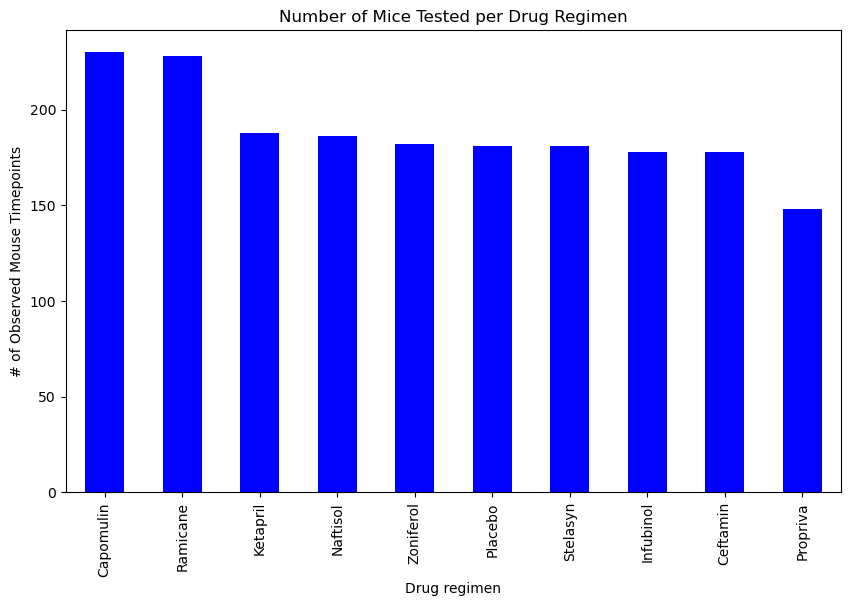

In [209]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
dreg_df.plot(kind="bar", facecolor="blue", figsize=(10,6),title = "Number of Mice Tested per Drug Regimen", xlabel ="Drug regimen",
                    ylabel = "# of Observed Mouse Timepoints")


dreg_df

TypeError: 'str' object is not callable

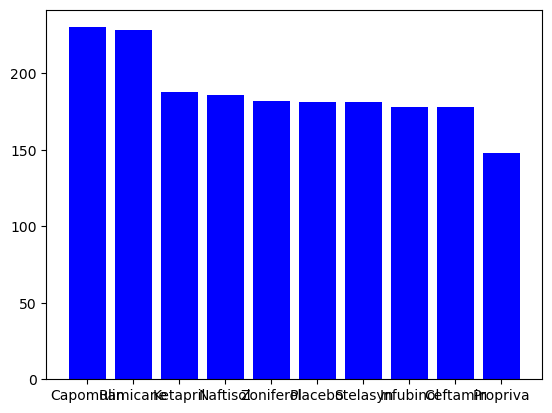

In [210]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = dreg_df.index.values
y_axis = dreg_df.values

plt.bar(x_axis, y_axis, color="blue", alpha=1, align='center')
plt.title("Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()


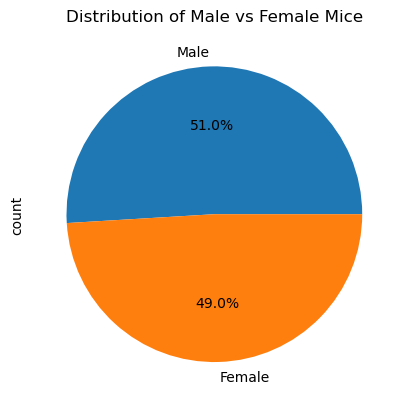

In [211]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_df = clean_mouse_df["Sex"].value_counts().plot(kind='pie', autopct="%1.1f%%",
                                                      title = "Distribution of Male vs Female Mice")


plt.show()

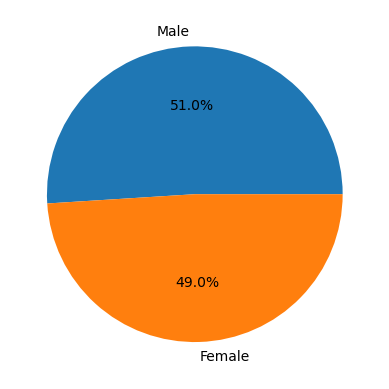

In [220]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# plt.title("Distribution of Male vs Female Mice") #######

labels = ["Male", "Female"]
sizes = [51, 49]
plt.pie(sizes, labels = labels,autopct="%1.1f%%")
# plt.title("Distribution of Male vs Female Mice")


plt.show()


# Quartiles, Outliers and Boxplots



In [221]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ramicane",:]
Infubinol_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ceftamin",:]


# # Start by getting the last (greatest) timepoint for each mouse
# Capomulin_final = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
# Ramicane_final = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
# Infubinol_final = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
# Ceftamin_final = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
# final_tumor_vol_df = pd.DataFrame({"Capomulin Last": Capomulin_final, "Ramicane Last": Ramicane_final,
#                                    "Infubinol Last": Infubinol_final, "Ceftamin Last": Ceftamin_final})
# final_tumor_vol_df
# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Capomulin Last,Ramicane Last,Infubinol Last,Ceftamin Last
Mouse ID,,,,
a203,NaN,NaN,45.0,NaN
a251,NaN,NaN,45.0,NaN
a275,NaN,NaN,NaN,45.0
a411,NaN,45.0,NaN,NaN
a444,NaN,45.0,NaN,NaN
...,...,...,...,...
y769,NaN,NaN,NaN,45.0
y793,45.0,NaN,NaN,NaN
y865,NaN,NaN,NaN,45.0


In [214]:
# each drug needs to be calculated separately

Capomulin_last = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Capomulin_final_vol = pd.DataFrame(Capomulin_last)
Capomulin_merged = pd.merge(Capomulin_final_vol, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merged.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [215]:
Ramicane_last = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
Ramicane_final_vol = pd.DataFrame(Ramicane_last)
Ramicane_merged = pd.merge(Ramicane_final_vol, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merged.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [216]:
Infubinol_last =Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
Infubinol_final_vol = pd.DataFrame(Infubinol_last)
Infubinol_merged = pd.merge(Infubinol_final_vol, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [217]:
Ceftamin_last = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_final_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merged = pd.merge(Ceftamin_final_vol, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [218]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen